## Borazjani and Sotiropoulos' Carangiform Model

Two non-dimensional parameters that characterize the steady inline performance of a carangiform swimmer are the Reynolds number ($Re$) of the flow and the Strouhal number ($St$) of the undulatory body motion.

* $L$ is the fish length
* $U$ is the steady inline swimming speed
* $v$ is the kinematic viscosity of the water
* $A$ is the maximum lateral excursion of the tail over a cycle
* $f$ is the tail beat frequency.

Most fishes have been shown swim near a 'universal' optimal value of 0.3.

### Fish body kinematics and non-dimensional parameters

The equation describing the lateral undulations of the fish body is given by

$$ h(z,t)=a(z)sin(kz-\omega t) $$

where

* $z$ is the axial (flow) direction measured along the fish axis from the tip of the fish head (essentially Lighthill's $x$-coordinate)
* $h(z,t)$ is the lateral (side-to-side) excursion at time $t$ (essentially Lighthill's $z$-coordinate)
* $a(z)$ is the first Fourier coefficient defining the amplitude envelope of lateral motion as a function of $z$
* $k$ is the wave number of the body undulations that corresponds to a wavelength $\lambda$
* $\omega$ is the angular frequency

The values given below were experimentally determined by Videler and Hess.

Table 1: Summaries of variables between Lighthill and Borazjani

|Variable|Lighthill|Borazjani|
|-|-|-|
|a|Fish coordinate|First Fourier coefficient for amplitude|
|h| |the lateral excursion|
|t|time|time|
|x|Horizontal coordinate along flow lines $(a,t)$| |
|y|Vertical coordinate| |
|z|Horizontal coordinate perpendiular to flow $(a,t)$|Axial flow direction measured along the fish axis from the tip of the fish head|
|u|Horizontal velocity vector (x direction in y=0 plane)| |
|v|Vertical velocity vector in y=0 plane (z direction)| |
|k| |Wavenumber|

Table 2: Equivalent variables between the two papers

|Lighthill|Borazjani|
|-|-|
|a| |
|x|z|
|y| |
|z|h|

In [18]:
%matplotlib inline

import math
import matplotlib.pyplot as plt

In [19]:
# Constants for the function a
a0 = 0.02
a1 = -0.08
a2 = 0.16
amax = 0.1

In [20]:
# Wave Parameters
# Note: I'm not really sure where half these constants come from
dimLam = 0.95
L = 1
k = 2*math.pi/(dimLam*1)
omega = 2*math.pi*0.3/(2*.01)
omegaT = [0, .25*math.pi, .5*math.pi, .75*math.pi, math.pi, 1.25*math.pi, 1.5*math.pi, 1.75*math.pi, 2*math.pi]

In [21]:
# Constants for dimensionless parameters
f = 1
hmax = amax*L

In [22]:
def a(z):
    '''
        First Fourier Coefficient describing the amplitude envelop of lateral motion
    '''
    return (a0 + a1*z +a2*(z**2))

In [23]:
def dAdZ(z):
    return (a1+2*a2*z)

In [24]:
def h(z, t):
    '''
        Represents the lateral excursion of the fish at time t
    '''
    return a(z)*math.sin(k*z-omega*t)

In [25]:
def omega1(u):
    '''
        Calculates a new omega depending on U
    '''
    St = 2*f*hmax/u
    return math.pi*St/amax

In [26]:
def k1(u):
    '''
        Calculates a new k depending on U
    '''
    return 2*math.pi/(dimLam*1)

In [27]:
def dHdZ(z, t):
    '''
        Finds Borijani's dh/dz at a given z and t
    '''
    return (dAdZ(z)*math.sin(k*z-omega*t) +a(z)*k*math.cos(k*z-omega*t))

In [28]:
def dHdt(z,t):
    '''
        Finds Borazjani's dh/dt (eqivalent to Lighthill dz/dt)
    '''
    return (-omega*a(z)*math.sin(k*z-omega*t))

In [29]:
'''
    These help set initial time and z variables
'''
times = [0, 0.1, 0.2, 0.3, 0.5, 1, 2, 4, 9, 10, 20]
time = 1
# Makes list with values 0-1 with 1/clarity increments
clarity = 100
zVals = range(0,clarity)
zVals = [z/clarity for z in zVals]

In [30]:
'''
    The following lines were used to recreate the weird Borzjani wavy graph.
    All variables are in Borazjani coordinates
'''
# Makes list of u vals
# Note: these U-vals refer to Borazjani's forward velocity
numUVals = 6
UVals = range(-numUVals,numUVals)
UVals = [u/numUVals+.1 for u in UVals]

In [31]:
# Use list comprehension to get values of h
# The list comprehension seems to work, but I keep getting the same few values for multiple values of time
hVals = [[h(z, t) for z in zVals] for t in times]

In [32]:
# Try to use h2 function to vary omega
h2Vals = [[h2(z, time, omega1(u), k1(u)) for z in zVals] for u in UVals]
aVals = [a(z) for z in zVals]

NameError: name 'h2' is not defined

In [33]:
'''
    Here, we tried to put Borazjani into Lighthill 
    I labeled Borzajani-based coordinates with a b afterwards, and 
    Lighthill-based coordinates with an l afterwards.
'''
# Determine (dh/dz)^2, then calculate the derivative of the arclength
dhdz2Vals = [dHdZ(z,time)**2 for z in zVals]
sPrime = [math.sqrt(1+dHdZ(z,time)**2) for z in zVals]

In [34]:
dz = L/clarity
print(dz)
sRects = [sP*dz for sP in sPrime]

0.01


In [35]:
# The following list comp produces a nearly linear fit...
arcLen = [sum(sRects[0:z]) for z in range(0,len(zVals))]

In [36]:
def estArc(z):
    '''
        Calculates the estimated arc length
        Note: doesn't work because z is not actually an index
        Just use the arcLen list comp above
    '''
    return sum(sRects[0:z*clarity])

In [37]:
# Let's try to findd the arclen using the above function
print (estArc(L))# Find arclen at various times
def arcBasedOnTime(t):
    # Set up all the variables as before but name them differently
    # to avoid confusing Python
    clar = 100
    zV = range(0,clarity)
    zV = [z/clarity for z in zV]

    dhdz2 = [dHdZ(z,t)**2 for z in zV]
    sPrime = [math.sqrt(1+dHdZ(z,t)**2) for z in zV]

    dzb = L/clar
    sRects = [sP*dzb for sP in sPrime]

    # We want to find the arclength across the whole fish, so add everything
    return sum(sRects)

1.0230780583271275


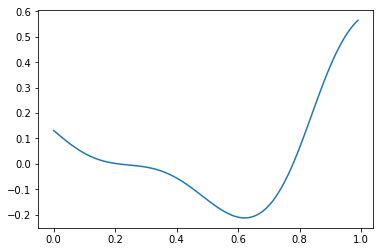

In [38]:
# Now make a list based off of times 
# note: omega is ~94. We need to vary omega*t between 0 and 2*pi.
# We find that 2*pi/94 = 0.66, so varying times between 0 and 0.66
# represents varied times over a period.
timesForArc = [0.66*t/clarity for t in range(0,100)]
arcsBasedtimes = [arcBasedOnTime(t) for t in timesForArc]
# All of the arclengths are about 1, which is what we should hope


'''
    General Notes from meetings bcs wow good organization:

    Finish find a-coord (arcLen)
    Xl = Zb
    Lighthill's dx/da = 1/sqrt(1+dhdz^2) = 1/sPrime
    dxl/dt is the forward velocity of the body (Use body len/sec = 1)
    dzl/dt is dh/dt
    To find dzl/da, we should find (dhb/dzb)/(dab/dzb)
'''
# Let's find dx/da and dz/da (Lighthill vars)
# Note: (dab/dzb) = da/dxl = sPrime
dxda = [1/sP for sP in sPrime]
dzda = [dHdZ(z,time)/math.sqrt(1+dHdZ(z,time)**2) for z in zVals]

# Test whether (dx/da)^2 + (dz/da)^2 = 1
tests = [dxa**2+dza**2 for (dxa,dza) in zip(dxda,dzda)]
# If you print tests, you'll see that the proposition is correct.
# Therefore, we can use the model

# Now, let's try to find the u and w vectors from Lighthill
# u = dx/dt*dx/da + dz/dt*dz/da
dzdt = [dHdt(z,time) for z in zVals]
uVec = [1*dxa + dzt*dza for (dxa,dzt,dza) in zip(dxda,dzdt,dzda)]
# w = dz/dt*dx/da - dx/dt*dz/da
wVec = [dzt*dxa - 1*dza for (dxa,dzt,dza) in zip(dxda,dzdt,dzda)]

plt.plot(zVals, dzda)
plt.show()

# Next, we need to find momentum...


# Now let's try to find dzl/dal = dhb/dal